## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
Ans: 
第100個epoch: 15s 299us/step - loss: 0.3127 - acc: 0.8894 - val_loss: 2.9604 - val_acc: 0.5065
第500個epoch: 15s 305us/step - loss: 0.0032 - acc: 0.9997 - val_loss: 5.2385 - val_acc: 0.5100
在第100個epoch之後, valid set的loss跟 acc 就開始變差了,到第500個epoch之後變的非常差


2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢
Ans:
改用SGD  訓練500次, valid set跟 training set的 loss及accuracy都朝向愈來愈好的方向,並且沒有overfit, 
但valid set的accuracy 最終跟 adam差不多
第500個epoch:  9s 190us/step - loss: 1.0422 - acc: 0.6374 - val_loss: 1.3579 - val_acc: 0.5166


In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0718 23:54:33.865025 11892 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 23:54:33.889027 11892 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 23:54:33.897024 11892 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0718 23:54:34.066019 11892 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 23:54:34.077021 11892 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0718 23:54:34.224018 11892 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0718 23:54:34.300022 11892 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 204us/step - loss: 2.2706 - acc: 0.1554 - val_loss: 2.2226 - val_acc: 0.1959
Epoch 2/500
50000/50000 [==============================] - 10s 201us/step - loss: 2.1920 - acc: 0.2260 - val_loss: 2.1623 - val_acc: 0.2447
Epoch 3/500
50000/50000 [==============================] - 10s 195us/step - loss: 2.1366 - acc: 0.2608 - val_loss: 2.1122 - val_acc: 0.2676
Epoch 4/500
50000/50000 [==============================] - 10s 203us/step - loss: 2.0892 - acc: 0.2809 - val_loss: 2.0676 - val_acc: 0.2928
Epoch 5/500
50000/50000 [==============================] - 10s 197us/step - loss: 2.0461 - acc: 0.2994 - val_loss: 2.0275 - val_acc: 0.3055
Epoch 6/500
50000/50000 [==============================] - 10s 199us/step - loss: 2.0105 - acc: 0.3103 - val_loss: 1.9972 - val_acc: 0.3127
Epoch 7/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.9818 - acc: 0.3191 - val_l

Epoch 59/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.6507 - acc: 0.4271 - val_loss: 1.6594 - val_acc: 0.4260
Epoch 60/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.6477 - acc: 0.4281 - val_loss: 1.6580 - val_acc: 0.4207
Epoch 61/500
50000/50000 [==============================] - 10s 205us/step - loss: 1.6449 - acc: 0.4291 - val_loss: 1.6535 - val_acc: 0.4258
Epoch 62/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.6418 - acc: 0.4297 - val_loss: 1.6500 - val_acc: 0.4257
Epoch 63/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.6393 - acc: 0.4314 - val_loss: 1.6479 - val_acc: 0.4253
Epoch 64/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.6364 - acc: 0.4321 - val_loss: 1.6483 - val_acc: 0.4261
Epoch 65/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.6335 - acc: 0.4335 - val_loss: 1.6447 - val_acc: 0.4274
Epoch 66/500


50000/50000 [==============================] - 10s 198us/step - loss: 1.5176 - acc: 0.4741 - val_loss: 1.5495 - val_acc: 0.4567
Epoch 118/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.5155 - acc: 0.4749 - val_loss: 1.5484 - val_acc: 0.4569
Epoch 119/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.5137 - acc: 0.4757 - val_loss: 1.5459 - val_acc: 0.4571
Epoch 120/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.5123 - acc: 0.4760 - val_loss: 1.5416 - val_acc: 0.4607
Epoch 121/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.5101 - acc: 0.4763 - val_loss: 1.5401 - val_acc: 0.4584
Epoch 122/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.5082 - acc: 0.4778 - val_loss: 1.5389 - val_acc: 0.4591
Epoch 123/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.5065 - acc: 0.4780 - val_loss: 1.5376 - val_acc: 0.4608
Epoch 124/500
50000/

Epoch 175/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.4221 - acc: 0.5067 - val_loss: 1.4735 - val_acc: 0.4797
Epoch 176/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.4205 - acc: 0.5079 - val_loss: 1.4796 - val_acc: 0.4771
Epoch 177/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.4186 - acc: 0.5091 - val_loss: 1.4740 - val_acc: 0.4795
Epoch 178/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.4174 - acc: 0.5095 - val_loss: 1.4777 - val_acc: 0.4813
Epoch 179/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.4162 - acc: 0.5087 - val_loss: 1.4786 - val_acc: 0.4737
Epoch 180/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.4150 - acc: 0.5095 - val_loss: 1.4731 - val_acc: 0.4785
Epoch 181/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.4131 - acc: 0.5099 - val_loss: 1.4723 - val_acc: 0.4798
Epoch 

Epoch 233/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.3420 - acc: 0.5336 - val_loss: 1.4334 - val_acc: 0.4925
Epoch 234/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.3406 - acc: 0.5346 - val_loss: 1.4244 - val_acc: 0.4971
Epoch 235/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.3391 - acc: 0.5345 - val_loss: 1.4203 - val_acc: 0.4932
Epoch 236/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.3376 - acc: 0.5340 - val_loss: 1.4248 - val_acc: 0.4904
Epoch 237/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.3368 - acc: 0.5358 - val_loss: 1.4188 - val_acc: 0.4944
Epoch 238/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.3355 - acc: 0.5356 - val_loss: 1.4227 - val_acc: 0.4947
Epoch 239/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.3340 - acc: 0.5363 - val_loss: 1.4203 - val_acc: 0.4925
Epoch 

Epoch 291/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.2707 - acc: 0.5580 - val_loss: 1.3935 - val_acc: 0.5066
Epoch 292/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.2692 - acc: 0.5595 - val_loss: 1.3854 - val_acc: 0.5041
Epoch 293/500
50000/50000 [==============================] - 10s 202us/step - loss: 1.2679 - acc: 0.5592 - val_loss: 1.3905 - val_acc: 0.5062
Epoch 294/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.2668 - acc: 0.5600 - val_loss: 1.4182 - val_acc: 0.5016
Epoch 295/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.2661 - acc: 0.5586 - val_loss: 1.4205 - val_acc: 0.4866
Epoch 296/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.2644 - acc: 0.5610 - val_loss: 1.3981 - val_acc: 0.4992
Epoch 297/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.2635 - acc: 0.5602 - val_loss: 1.3892 - val_acc: 0.5045
Epoch 

Epoch 349/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.2042 - acc: 0.5807 - val_loss: 1.3983 - val_acc: 0.5013
Epoch 350/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.2024 - acc: 0.5810 - val_loss: 1.3577 - val_acc: 0.5182
Epoch 351/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.2019 - acc: 0.5807 - val_loss: 1.3656 - val_acc: 0.5151
Epoch 352/500
50000/50000 [==============================] - 10s 201us/step - loss: 1.2014 - acc: 0.5819 - val_loss: 1.3782 - val_acc: 0.5082
Epoch 353/500
50000/50000 [==============================] - 10s 195us/step - loss: 1.1996 - acc: 0.5820 - val_loss: 1.3650 - val_acc: 0.5159
Epoch 354/500
50000/50000 [==============================] - 10s 198us/step - loss: 1.1982 - acc: 0.5827 - val_loss: 1.3615 - val_acc: 0.5175
Epoch 355/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.1968 - acc: 0.5838 - val_loss: 1.3710 - val_acc: 0.5148
Epoch 

Epoch 407/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.1407 - acc: 0.6019 - val_loss: 1.3595 - val_acc: 0.5145
Epoch 408/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.1401 - acc: 0.6035 - val_loss: 1.3503 - val_acc: 0.5207
Epoch 409/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.1386 - acc: 0.6040 - val_loss: 1.3502 - val_acc: 0.5232
Epoch 410/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.1378 - acc: 0.6048 - val_loss: 1.3833 - val_acc: 0.5106
Epoch 411/500
50000/50000 [==============================] - 10s 194us/step - loss: 1.1362 - acc: 0.6053 - val_loss: 1.3470 - val_acc: 0.5191
Epoch 412/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.1356 - acc: 0.6061 - val_loss: 1.3618 - val_acc: 0.5151
Epoch 413/500
50000/50000 [==============================] - 10s 199us/step - loss: 1.1337 - acc: 0.6056 - val_loss: 1.3374 - val_acc: 0.5285
Epoch 

Epoch 465/500
50000/50000 [==============================] - 10s 191us/step - loss: 1.0808 - acc: 0.6233 - val_loss: 1.4100 - val_acc: 0.5058
Epoch 466/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.0790 - acc: 0.6228 - val_loss: 1.3643 - val_acc: 0.5138
Epoch 467/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.0795 - acc: 0.6227 - val_loss: 1.3360 - val_acc: 0.5255
Epoch 468/500
50000/50000 [==============================] - 10s 196us/step - loss: 1.0747 - acc: 0.6246 - val_loss: 1.3334 - val_acc: 0.5298
Epoch 469/500
50000/50000 [==============================] - 10s 200us/step - loss: 1.0770 - acc: 0.6240 - val_loss: 1.3382 - val_acc: 0.5299
Epoch 470/500
50000/50000 [==============================] - 10s 192us/step - loss: 1.0749 - acc: 0.6257 - val_loss: 1.3286 - val_acc: 0.5293
Epoch 471/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.0753 - acc: 0.6253 - val_loss: 1.3323 - val_acc: 0.5301
Epoch 

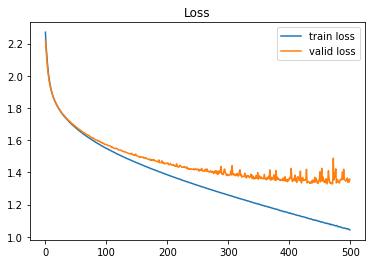

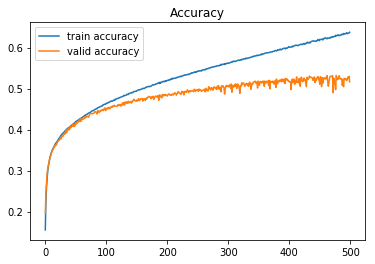

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()